**K-Means** 

K-Means algorithm splits a dataset $X \in \{x_1, \dots, x_N\}$ into $K$ many partitions, where each $X_k \subseteq X \quad \forall k \in \{1, \dots, K\}$. Clustering algorithms like the *K-Means* is a useful technique when the true labels are unknown. Or in other words, we are basically interested in analyzing patterns within the data and make useful inferences.    

In this task, you will implement a *K-Means* algorithm from scratch using the dataset **"HTRU_2.csv"**. The dataset contains 8 continuous variables describing a pulsar candidate (https://archive.ics.uci.edu/ml/datasets/HTRU2). The task is to identify ($K$) clusters that might best describe the classes within the data. 


The basic algorithm is given by:

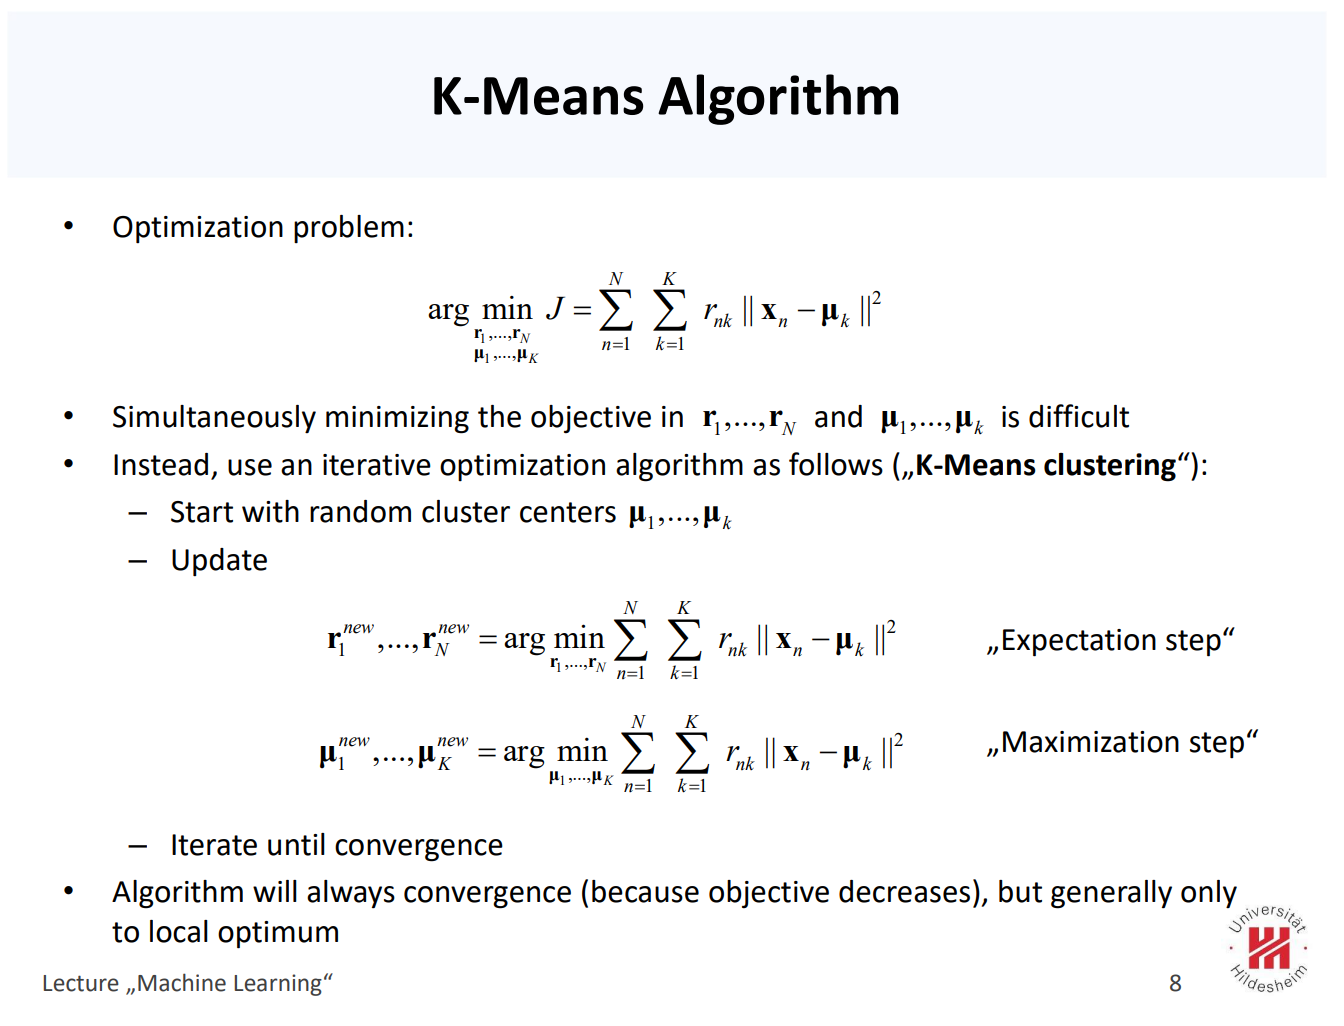

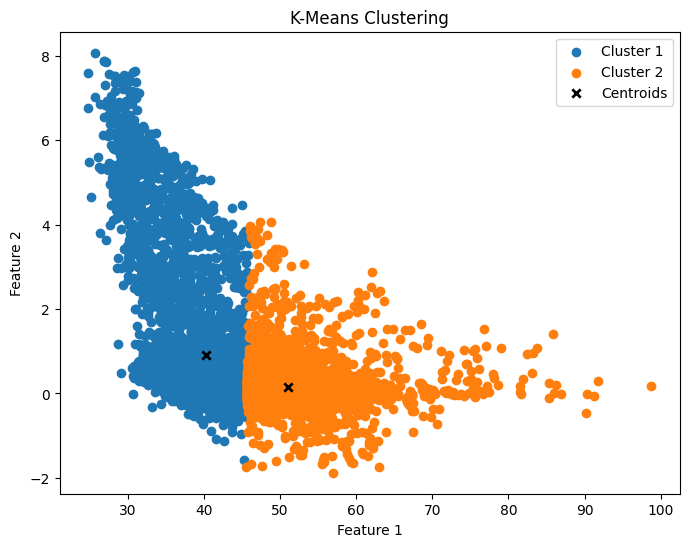

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

data = pd.read_csv("/Users/nasibhuseynzade/Downloads/HTRU_2.csv", sep=',')  
XX = data.iloc[:, 1:3].values

class KMeans:
    def __init__(self, k, max_iters=100):
        self.k = k
        self.max_iters = max_iters

    def fit(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # Initialize centroids randomly
        self.centroids = X[np.random.choice(self.n_samples, self.k, replace=False)]

        for _ in range(self.max_iters):
            # Assign each data point to the nearest centroid
            labels = self._assign_labels()

            # Update centroids based on the mean of assigned points
            new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(self.k)])

            # Check for convergence
            if np.all(self.centroids == new_centroids):
                break

            self.centroids = new_centroids

    def _assign_labels(self):
        # Compute distances from each point to each centroid
        distances = np.linalg.norm(self.X[:, np.newaxis, :] - self.centroids, axis=2)

        # Assign labels based on the nearest centroid
        labels = np.argmin(distances, axis=1)

        return labels

    def plot_clusters(self):
        if self.n_features > 2:
            print("Cannot plot clusters for more than 2 features.")
            return

        plt.figure(figsize=(8, 6))

        for i in range(self.k):
            cluster_points = self.X[kmeans._assign_labels() == i]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i + 1}')

        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], marker="x", color="black", linewidth=2, label="Centroids")
        plt.title("K-Means Clustering")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.legend()
        plt.show()


kmeans = KMeans(k=2)
kmeans.fit(XX)
kmeans.plot_clusters()


**Evaluation**

Since K-means is an unsupervised approach, we need to find a method of finding out the best $K$ for the task. There are multiple methods of determining the ideal K for a given dataset. Read up and implement atleast one of these methods from scratch:
1. Elbow 
1. Average silhouette method
1. Gap statistic method

- Create a visualization to show the statistics for the selected method vs different number of clusters $K$. Comment on how the best *K* is found using the method of your choice.

*In case you did not do the first part of this question, you can use sklearn implementation of KMeans clustering for this. You can also implement any other method that you find to determine the optimal K*

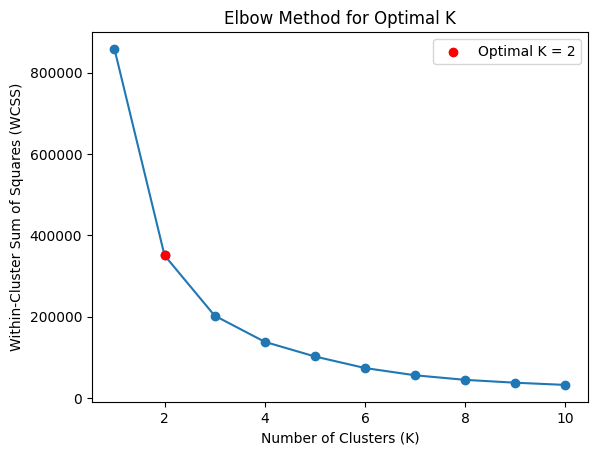

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_distance(point1, point2):
    return np.linalg.norm(point1 - point2)

def assign_clusters(data, centroids):
    clusters = {}
    for point in data:
        closest_centroid_index = np.argmin([calculate_distance(point, centroid) for centroid in centroids])
        if closest_centroid_index not in clusters:
            clusters[closest_centroid_index] = []
        clusters[closest_centroid_index].append(point)
    return clusters

def update_centroids(clusters):
    return [np.mean(clusters[i], axis=0) for i in sorted(clusters.keys())]

def kmeans(data, k, max_iterations=100):
    centroids = data[np.random.choice(range(len(data)), k, replace=False)]

    for _ in range(max_iterations):
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(clusters)

        if np.all(np.array(new_centroids) == np.array(centroids)):
            break

        centroids = new_centroids

    return centroids, clusters

def calculate_wcss(data, k):
    centroids, clusters = kmeans(data, k)
    
    wcss = 0
    for i in clusters:
        cluster_points = np.array(clusters[i])
        centroid = centroids[i]
        wcss += np.sum(np.square(np.linalg.norm(cluster_points - centroid, axis=1)))

    return wcss

def find_optimal_k(data, max_k):
    wcss_values = [calculate_wcss(data, k) for k in range(1, max_k + 1)]
    
    second_derivative = np.diff(np.diff(wcss_values))
    optimal_k_index = np.argmax(second_derivative) + 1
    
    return optimal_k_index + 1

def plot_elbow(wcss_values, max_k, optimal_k):
    plt.plot(range(1, max_k + 1), wcss_values, marker='o')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    
    plt.scatter(optimal_k, wcss_values[optimal_k - 1], color='red', label=f'Optimal K = {optimal_k}', zorder=5)
    
    plt.legend()
    plt.show()

max_k_value = 10

# Calculate WCSS values for different k
wcss_values = [calculate_wcss(XX, k) for k in range(1, max_k_value + 1)]

# Find the optimal k
optimal_k = find_optimal_k(XX, max_k_value)

# Plot the Elbow Method graph
plot_elbow(wcss_values, max_k_value, optimal_k)


**Visualization**

- Principal Components Analysis (PCA) is a widely used method for reducing the number of dimensions to a low dimensional representation of the data. Create a function that performs PCA on the given dataset. (You are allowed to use numpy.linalg.svd for single value decomposition).
- Use (PCA) to reduce the dimensionality of the data and represent the clusters (K-means) as both 2D and 3D visualizations. 

*In case you did not do the first part of this question, you can use sklearn implementation of KMeans clustering for this.*

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


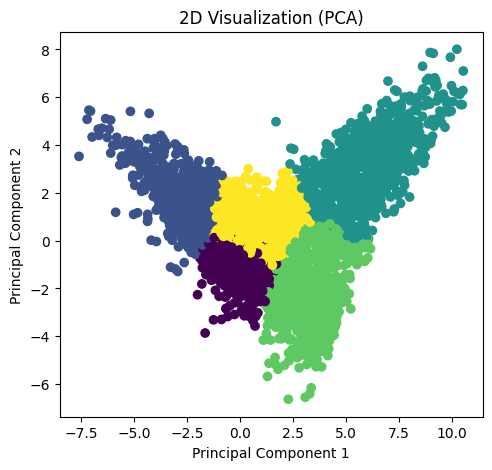

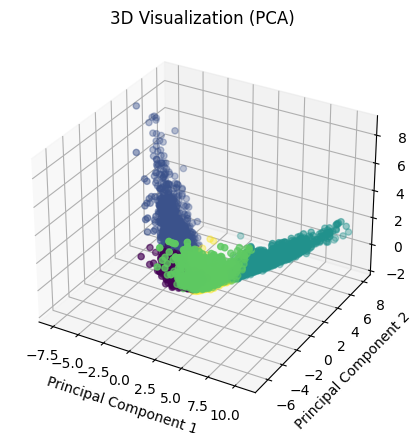

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


data = pd.read_csv("/Users/nasibhuseynzade/Downloads/HTRU_2.csv", sep=',')  
XX_ = data.iloc[:, 1:8].values

# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(XX_)

# Apply PCA
pca = PCA(n_components=7)  # Reduce to 3 principal components for 3D visualization
principal_components = pca.fit_transform(data_standardized)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(principal_components)
labels = kmeans.labels_

# Visualize in 2D
plt.figure(figsize=(12, 5))

# Plot 2D PCA
plt.subplot(1, 2, 1)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis')
plt.title('2D Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Visualize in 3D
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2], c=labels, cmap='viridis')
ax.set_title('3D Visualization (PCA)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()
